<img src = "../imgs/Banner_Logo.jpeg"/>

# Computer Vision Fundamentals: OpenCV with Python

OpenCV (Open Source Computer Vision) is a library of programming functions mainly aimed at real-time computer vision. OpenCV is written in C++, but there are bindings in Python, Java and Matlab. So, here we will perform some basic digital image processing operations using OpenCV as a Python module.   

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Images and videos with opencv 
### Dealing with images...

+ Images are matrices of three channels, namely in format R (red),G (green), B (blue).

+ Namely each pixel represent a color value intensities between [0-255] = $2^8$. In color, each matrix reprent the quantity of color at each channel

+ Images data type is uint8 but we should convert in float64 to perfom operations

**Note**: In opencv RGB channels are coded as BGR


You have a location (x,y) = (50,47)
The following is the shape of our image. (height, width, channels) (rows, columns , channels)
(211, 480, 3)
('The information of the pixel-1 is the following: ', array([ 58,  31, 111], dtype=uint8))
('The information of the pixel-2 is the following: ', array([111,  31,  58], dtype=uint8))


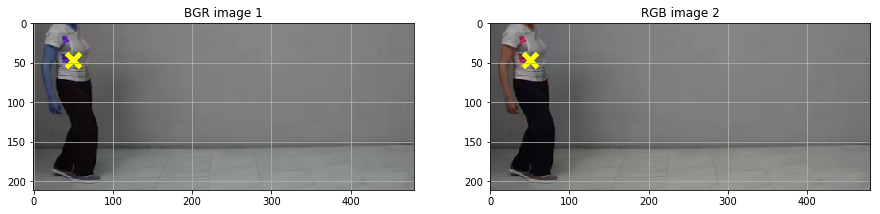

In [2]:
I = cv.imread("frames/gait/1.jpg")
image1 = I
image2 = I[:,:,::-1]
#========================================================
#Location coordinates
x = 50
y = 47
#========================================================
print("==========================================================================================")
print("You have a location (x,y) = ({},{})".format(x,y))
print("==========================================================================================")
print("==========================================================================================")
print("The following is the shape of our image. (height, width, channels) (rows, columns , channels)")
print(I.shape)
print("==========================================================================================")

pixel1 = image1[x,y]
pixel2 = image2[x,y]
plt.figure(figsize=(15,20))
plt.subplot(121), plt.imshow(image1)# <=============== BGR
plt.scatter(x,y, marker="x", s=200, linewidth=5, c="yellow")
plt.title("BGR image 1")
plt.grid()
print("==========================================================================================")
print("The information of the pixel-1 is the following: ",pixel1)
print("==========================================================================================")
plt.subplot(122), plt.imshow(image2) # <===== RGB 
plt.scatter(x,y, marker="x", s=200, linewidth=5, c="yellow")
plt.title("RGB image 2")
plt.grid()

print("==========================================================================================")
print("The information of the pixel-2 is the following: ",pixel2)
print("==========================================================================================")

## Datatype importance

### uint8 VS float64

the following Cell will show you why we should make operations using float64, usually images come with a datatype **uint8**. However, if you need to perform math operations over your image, don't forget to cast your datatype to **float64**

Text(0.5,1,u'Gray image uint8')

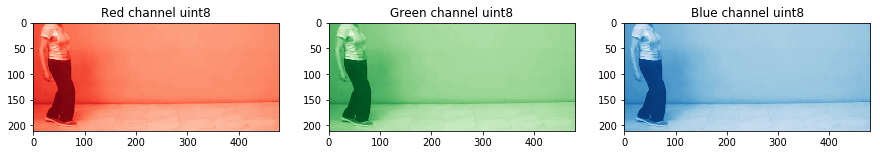

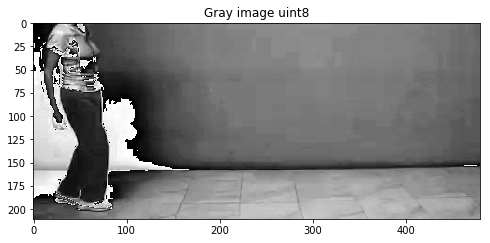

In [3]:
imageR = image2[:,:,0]
imageB = image2[:,:,0]
imageG = image2[:,:,0]
grayImage = (imageR + imageG + imageB)/3
plt.figure(figsize=(15,20))
plt.subplot(131), plt.imshow(imageR, cmap='Reds_r'), plt.title("Red channel uint8")# Red channel
plt.subplot(132), plt.imshow(imageG, cmap='Greens_r'), plt.title("Green channel uint8")# Green channel.
plt.subplot(133), plt.imshow(imageB, cmap='Blues_r'), plt.title("Blue channel uint8")# Blue channel
plt.figure(figsize=(8,8))
plt.imshow(grayImage, cmap='gray')
plt.title("Gray image uint8")

Now, take a look to the gray scale image, how does it look like for you? is it better now? or was it before?

Text(0.5,1,u'Gray image float64')

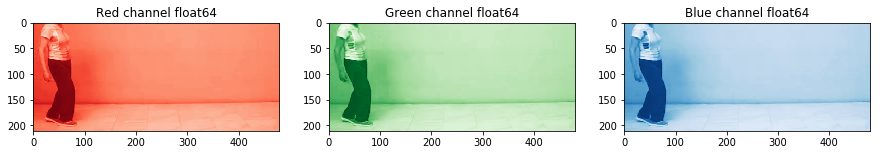

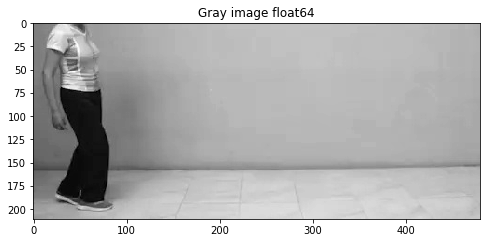

In [4]:
imageR = np.array(image2[:,:,0], np.float64)
imageB = np.array(image2[:,:,1], np.float64)
imageG = np.array(image2[:,:,2], np.float64)
grayImage = (imageR + imageG + imageB)/3
plt.figure(figsize=(15,20))
plt.subplot(131), plt.imshow(imageR, cmap='Reds_r'), plt.title("Red channel float64")# Red channel
plt.subplot(132), plt.imshow(imageG, cmap='Greens_r'), plt.title("Green channel float64")# Green channel.
plt.subplot(133), plt.imshow(imageB, cmap='Blues_r'), plt.title("Blue channel float64")# Blue channel
plt.figure(figsize=(8,8))
plt.imshow(grayImage, cmap='gray')
plt.title("Gray image float64")

## Here, you will see how an image is stored as a matrix

In [5]:
imageR

array([[  86.,   86.,   86., ...,  120.,  120.,  120.],
       [  86.,   86.,   86., ...,  120.,  120.,  120.],
       [  86.,   86.,   86., ...,  120.,  120.,  120.],
       ..., 
       [ 104.,  104.,  104., ...,  137.,  137.,  137.],
       [ 102.,  102.,  102., ...,  137.,  137.,  137.],
       [ 101.,  101.,  102., ...,  137.,  137.,  137.]])

### Try to display the values of another image!

## Dealing with videos

Videos, can be seen like an array/list of frames stacked.

<img src = "../imgs/video_frames.png"  style="width: 500px; height: 300px" />

In the following cells we are going to interact with videos.

+ We will save the frames into a folder
+ Finally, we will stack all the frames into an array


## Reading a video

The video has 609.0 frames


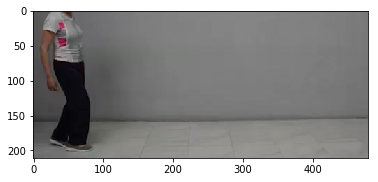

In [6]:
path = "../videos/gait.mp4"
V = cv.VideoCapture(path)
ret,f = V.read()
plt.imshow(f[...,::-1])

print("The video has {} frames".format(V.get(cv.CAP_PROP_FRAME_COUNT)))

#This function allow us to create folders.
def create_directory(path):
    import os
    # define the name of the directory to be created
    gait_frames_path = path
    try:
        os.makedirs(gait_frames_path)
        print("=========================================================")
        print("The folder "+gait_frames_path+" was created sucessfully!")
        print("=========================================================")
    except Exception as e:
        print("=========================================================")
        print("There was an error creating the folder "+gait_frames_path+"\n message: "+str(e))
        print("=========================================================")
        


## Saving images on your local machine

In [7]:
gait_frames_path = "video/gait/frames/"
create_directory(gait_frames_path)
V.set(cv.CAP_PROP_POS_FRAMES, 0); 
ret,f = V.read()
counter = 0
while ret:
    counter += 1
    fname = gait_frames_path + str(counter)+".jpg"
    
    cv.imwrite(fname, f)
    print("Generating frame "+str(counter))
    ret,f = V.read()

The folder video/gait/frames/ was created sucessfully!
Generating frame 1
Generating frame 2
Generating frame 3
Generating frame 4
Generating frame 5
Generating frame 6
Generating frame 7
Generating frame 8
Generating frame 9
Generating frame 10
Generating frame 11
Generating frame 12
Generating frame 13
Generating frame 14
Generating frame 15
Generating frame 16
Generating frame 17
Generating frame 18
Generating frame 19
Generating frame 20
Generating frame 21
Generating frame 22
Generating frame 23
Generating frame 24
Generating frame 25
Generating frame 26
Generating frame 27
Generating frame 28
Generating frame 29
Generating frame 30
Generating frame 31
Generating frame 32
Generating frame 33
Generating frame 34
Generating frame 35
Generating frame 36
Generating frame 37
Generating frame 38
Generating frame 39
Generating frame 40
Generating frame 41
Generating frame 42
Generating frame 43
Generating frame 44
Generating frame 45
Generating frame 46
Generating frame 47
Generating fra

Generating frame 398
Generating frame 399
Generating frame 400
Generating frame 401
Generating frame 402
Generating frame 403
Generating frame 404
Generating frame 405
Generating frame 406
Generating frame 407
Generating frame 408
Generating frame 409
Generating frame 410
Generating frame 411
Generating frame 412
Generating frame 413
Generating frame 414
Generating frame 415
Generating frame 416
Generating frame 417
Generating frame 418
Generating frame 419
Generating frame 420
Generating frame 421
Generating frame 422
Generating frame 423
Generating frame 424
Generating frame 425
Generating frame 426
Generating frame 427
Generating frame 428
Generating frame 429
Generating frame 430
Generating frame 431
Generating frame 432
Generating frame 433
Generating frame 434
Generating frame 435
Generating frame 436
Generating frame 437
Generating frame 438
Generating frame 439
Generating frame 440
Generating frame 441
Generating frame 442
Generating frame 443
Generating frame 444
Generating fr

Inside the gait folder you will find the generated video frames:

<img src="../imgs/frames.PNG">

## Stacking frames into an array 

In the following cell we will stack all the frames into an array, our array will have: (height, width, channels, frames)

In [8]:
read_numpy_video = True
i = 0
V = cv.VideoCapture("../videos/gait.mp4")
H = V.get(cv.CAP_PROP_FRAME_HEIGHT)
W = V.get(cv.CAP_PROP_FRAME_WIDTH)
frames = int(V.get(cv.CAP_PROP_FRAME_COUNT))
gait = np.empty((int(H),int(W),3,int(frames)))
print ("The height in pixels is:", H)
print ("The width in pixels is:",W) 
print ("The number of frames is:",frames)

ret,f = V.read()
while ret:
    if(read_numpy_video):
        gait[:,:,:,i] = f
        i = i + 1
    ret,f = V.read()

print("All the frames were already loaded!")

('The height in pixels is:', 211.0)
('The width in pixels is:', 480.0)
('The number of frames is:', 609)
All the frames were already loaded!


Now, make some experiments with Interact tool from Jupyter Widgets.

### Frame by frame interaction and dynamic updating

In [9]:
#conda install -c conda-forge ipywidgets
if(read_numpy_video):
    from ipywidgets import interact, interact_manual, fixed
    import ipywidgets as widgets

    def plot_a_frame(image, frame, RGB = False):
        image = np.array(image,np.uint8)
        if (RGB):
            plt.imshow(image[:,:,::-1,frame])
        else:
            plt.imshow(image[:,:,0,frame], cmap = "gray")

    interact(plot_a_frame, frame=widgets.IntSlider(min=0,max=frames-1, step=1,value=10), 
             image = fixed(gait) , RBG = fixed(False))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMCwgZGVzY3JpcHRpb249dSdmcmFtZScsIG1heD02MDgpLCBDaGVja2JveCh2YWx1ZT1GYWxzZSwgZGVzY3JpcHRpb249dSfigKY=


### Plot a specific frame of interest.

In the following cell you are allowed to select RGB or gray scale plot, also you can choose the frame that you would like to plot on the screen.

In [10]:
interact_manual(plot_a_frame, image = fixed(gait),frame = widgets.IntSlider(min=0,max=(frames-1),
                                                         step=1,value=0))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J2ZyYW1lJywgbWF4PTYwOCksIENoZWNrYm94KHZhbHVlPUZhbHNlLCBkZXNjcmlwdGlvbj11J1LigKY=


<function __main__.plot_a_frame>

Free your resources!


In [11]:
if (read_numpy_video):
    del gait

## Image Blending

Images are matrices and therefore we can do elementwise operations such as sum, multiplication, etc.

+ For instance, image blending (weighted fusion) is obtained as:
$$I_b = \alpha I_1 + (1-\alpha)I_2$$

where $\alpha \in [0-1]$ 

(211, 480, 3)


Text(0.5,1,u'Image blending alpha = 0.6')

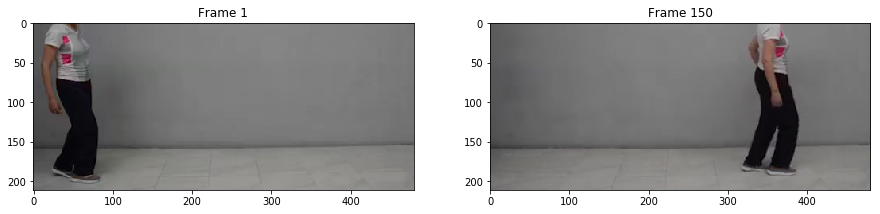

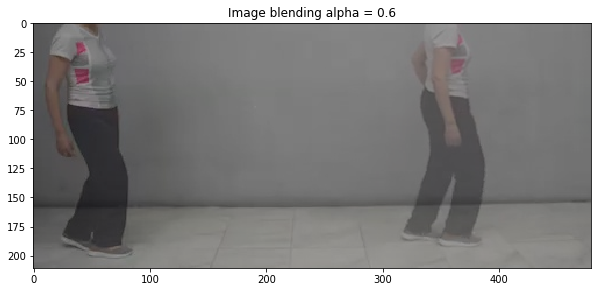

In [12]:
I1 = cv.imread('video/gait/frames/1.jpg')
I2 = cv.imread('video/gait/frames/150.jpg')
#Image shapes must be the same!
I1 = I1[:211,:480,:]
I2 = I2[:211,:480,:]

alpha = 0.6
blending = alpha*I1 + (1-alpha)*I2
blending = blending.astype(np.uint8)
print(blending.shape)

cv.imwrite("../imgs/bleding.png", blending)

plt.figure(figsize=(15,20))
plt.subplot(121), plt.imshow(I1[...,::-1]), plt.title("Frame 1")
plt.subplot(122), plt.imshow(I2[...,::-1]), plt.title("Frame 150")

plt.figure(figsize=(10,15))
plt.imshow(blending[...,::-1]);
plt.title("Image blending alpha = {}".format(alpha))

In [13]:
def image_blending(image1,image2,alpha):
    I1 = image1[:211,:480,:]
    I2 = image2[:211,:480,:]

    blending = alpha*I1 + (1-alpha)*I2
    blending = blending.astype(np.uint8)
    print(blending.shape)

    cv.imwrite("../imgs/bleding.png", blending)

    plt.figure(figsize=(10,15))
    plt.imshow(blending[...,::-1]);
    
interact_manual(image_blending, image1 = fixed(I1), image2 = fixed(I2),
        alpha = (0,1,0.01))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3JpcHRpb249dSdhbHBoYScsIG1heD0xLjAsIHN0ZXA9MC4wMSksIEJ1dHRvbihkZXNjcmlwdGlvbj11J1LigKY=


<function __main__.image_blending>

## Image Multiplication

Since Images are matrices you can also perform multiplications 
$$I = A * B$$


(211, 480, 3)


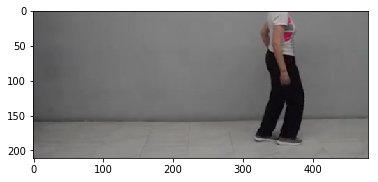

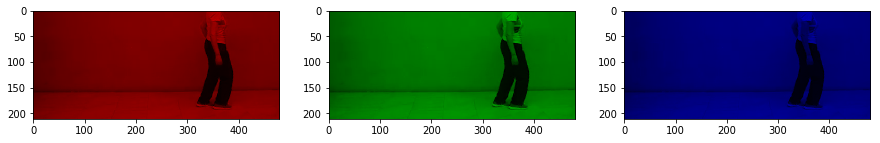

In [14]:
U = cv.imread('video/gait/frames/150.jpg')
plt.imshow(U[...,::-1]),
print(U.shape)


UR = np.zeros(shape=U.shape,dtype=np.uint8) 
UR[:,:,2] = U[:,:,2]
UG = np.zeros(shape=U.shape,dtype=np.uint8)
UG[:,:,1] = U[:,:,1];
UB = np.zeros(shape=U.shape,dtype=np.uint8)
UB[:,:,0] = U[:,:,0];

plt.figure(figsize=(15,20))
plt.subplot(131), plt.imshow(UR[...,::-1]) 
plt.subplot(132), plt.imshow(UG[...,::-1])
plt.subplot(133), plt.imshow(UB[...,::-1]);

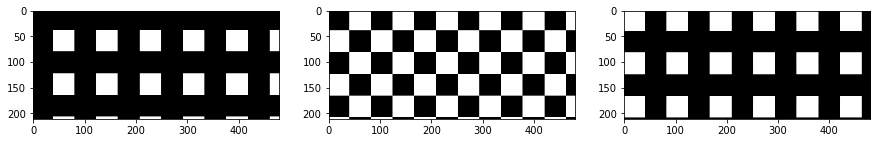

In [15]:
mA = cv.imread('../imgs/mA.png'); mA = mA[:211,:480,0]
mB = cv.imread('../imgs/mB.png'); mB = mB[:211,:480,0]
mC = cv.imread('../imgs/mC.png'); mC = mC[:211,:480,0]

plt.figure(figsize=(15,20))
plt.subplot(131), plt.imshow(mA,cmap='gray') 
plt.subplot(132), plt.imshow(mB,cmap='gray')
plt.subplot(133), plt.imshow(mC,cmap='gray');

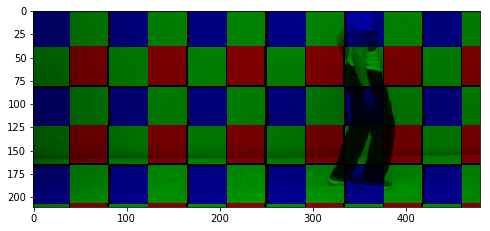

In [16]:
UN = np.zeros(shape=U.shape,dtype=np.uint8)

mA = mA/255
mA = mA.astype(np.uint8)
mB = mB/255
mB = mB.astype(np.uint8)
mC = mC/255
mC = mC.astype(np.uint8)
 
UN[:,:,2] = UR[:,:,2]*mA
UN[:,:,1] = UG[:,:,1]*mB
UN[:,:,0] = UB[:,:,0]*mC

plt.figure(figsize=(8,13))
plt.imshow(UN[...,::-1]);

<img src="../imgs/bannerThanks.jpg" style="width:1000px;">